# Cloud Inpainting on SEN3 Data
This notebook is a quick test to load, mask with clouds and then try and recover the data hidden by clouds using an inpainting DL model

In [1]:
import utils.prepare_dataset as predat
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from network.model import GenModel
from network.loss import lossL1


2024-06-20 01:33:07.030680: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 01:33:07.031151: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 01:33:07.034739: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 01:33:07.080304: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 01:33:07.917238: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
ds,dsc = predat.prepare_dataset(low_bound=0, high_bound=15, num_clouds=1000, num_samples=1000)

There are 17875 cloud masks in the directory
There are 5996 cloud masks between 0 and 15 percent of coverage
Cloud masks loaded
There are 15794 batches with no clouds
SEN3 files selected
SEN3 files loaded
Masking images...
Images masked


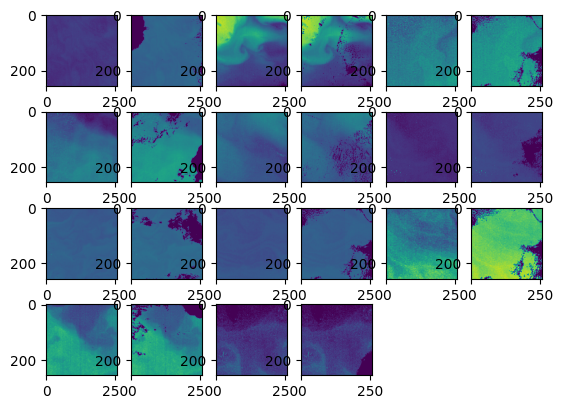

In [3]:
for i in range(1,12):
    plt.subplot(4,6,2*i-1)
    plt.imshow(ds["Oa01_reflectance"][i])
    plt.subplot(4,6,2*i)
    plt.imshow(dsc["Oa01_reflectance"][i])

## Extracting the bands from the Xarrays

The goal here is to convert the data into a more tensorflow friendly data format

In [4]:
dsnp = np.ndarray((256,256,11,1000))
dsnp_c = np.ndarray((256,256,11,1000))
for i in range(1,12):
    dsnp[:,:,i-1,:] = np.moveaxis(ds["Oa"+str(i).zfill(2)+"_reflectance"].values,0,2)
    dsnp_c[:,:,i-1,:] = np.moveaxis(dsc["Oa"+str(i).zfill(2)+"_reflectance"].values,0,2)


np.save('Ground_truth.npy', dsnp)
np.save('Cloudy_DS.npy', dsnp_c)

ValueError: could not broadcast input array from shape (256,256,12) into shape (256,256,2)

In [ ]:
np.max(dsnp[:,:,:,0])
np.max(dsnp_c[:,:,:,0])
dsc.isnull().any()

<xarray.Dataset> Size: 11B
Dimensions:           ()
Data variables:
    Oa01_reflectance  bool 1B False
    Oa02_reflectance  bool 1B False
    Oa03_reflectance  bool 1B False
    Oa04_reflectance  bool 1B False
    Oa05_reflectance  bool 1B False
    Oa06_reflectance  bool 1B False
    Oa07_reflectance  bool 1B False
    Oa08_reflectance  bool 1B False
    Oa09_reflectance  bool 1B False
    Oa10_reflectance  bool 1B False
    Oa11_reflectance  bool 1B False